In [2]:
from numba import njit
import functions_new_jit as func
import importlib
importlib.reload(func)

##########################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

"simulate_riot_sectors" function test

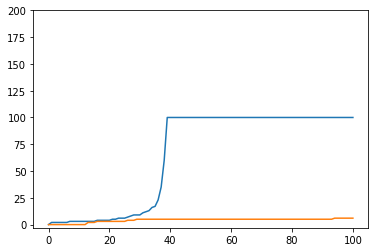

In [4]:
N = 200
average = 45
deviation = 12

agents = func.create_agents(N,average,deviation)
sector0_size = 100
sector1_size = 100

system = func.System(agents, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors(system, steps)

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors" sector0 heatmap

100.00%


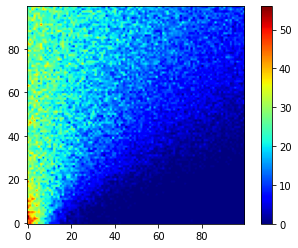

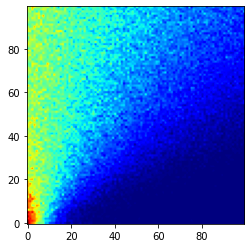

In [15]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 1
simulations = 1

heat_map_0 = np.zeros((100,100))
heat_map_total = np.zeros((100,100))
heat_map_maior = np.zeros((100,100))
heat_map_menor = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_0 = 0
        average_size_total = 0
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps)
            average_size_0 += final[0][-1]
            average_size_total += final[0][-1] + final[1][-1]
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_0 = average_size_0/simulations
        average_size_total = average_size_total/simulations
        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_0[i][k] = average_size_0
        heat_map_total[i][k] = average_size_total
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor


plt.figure()
plt.imshow(heat_map_0, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(heat_map_total, origin="lower",cmap="jet")
plt.colorbar()
plt.show()

In [11]:
@njit(parallel=True)
def zas():
    N = 200
    averages_sample = np.arange(0,100)  # average value of the normal distribution
    deviations = np.arange(0,100)       # standard deviations of the normal distribution

    sector0_size = 100
    sector1_size = 100

    steps = 100
    simulations = 100

    heat_map_0 = np.zeros((100,100))
    heat_map_total = np.zeros((100,100))
    heat_map_maior = np.zeros((100,100))
    heat_map_menor = np.zeros((100,100))

    for k in averages_sample:

        for i in deviations:         # a set of simulations per standard deviation value
            average_size_0 = 0
            average_size_total = 0
            average_size_maior = 0
            average_size_menor = 0

            for j in range(simulations):   # riot simulation
                agents = func.create_agents(N,k,i)
                system = func.System(agents, sector0_size, sector1_size)
                final = func.simulate_riot_sectors(system, steps)
                average_size_0 += final[0][-1]
                average_size_total += final[0][-1] + final[1][-1]
                average_size_maior += max(final[0][-1],final[1][-1])
                average_size_menor += min(final[0][-1],final[1][-1])

            average_size_0 = average_size_0/simulations
            average_size_total = average_size_total/simulations
            average_size_maior = average_size_maior/simulations
            average_size_menor = average_size_menor/simulations
            heat_map_0[i][k] = average_size_0
            heat_map_total[i][k] = average_size_total
            heat_map_maior[i][k] = average_size_maior
            heat_map_menor[i][k] = average_size_menor

    return heat_map_0, heat_map_total, heat_map_menor, heat_map_maior

0.0
1.0101010101010102
2.0202020202020203
3.0303030303030303
4.040404040404041
5.05050505050505
6.0606060606060606
7.070707070707071
8.080808080808081
9.090909090909092
10.1010101010101
11.11111111111111
12.121212121212121
13.131313131313131
14.141414141414142
15.151515151515152
16.161616161616163
17.171717171717173
18.181818181818183
19.19191919191919
20.2020202020202
21.21212121212121
22.22222222222222
23.232323232323232
24.242424242424242
25.252525252525253
26.262626262626263
27.272727272727273
28.282828282828284
29.292929292929294
30.303030303030305
31.31313131313131
32.323232323232325
33.333333333333336
34.343434343434346
35.35353535353536
36.36363636363637
37.37373737373738
38.38383838383838
39.39393939393939
40.4040404040404
41.41414141414141
42.42424242424242
43.43434343434343
44.44444444444444
45.45454545454545
46.464646464646464
47.474747474747474
48.484848484848484
49.494949494949495
50.505050505050505
51.515151515151516
52.525252525252526
53.535353535353536
54.5454545454545

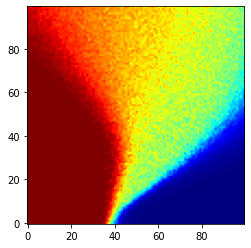

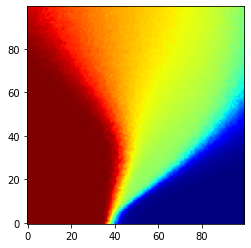

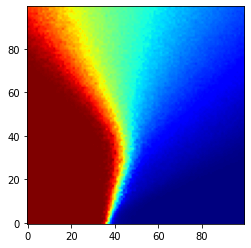

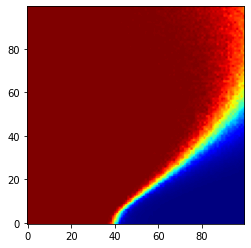

In [12]:
h0, h1, h2, h3 = zas()

plt.figure()
plt.imshow(h0, origin="lower",cmap="jet")
plt.show()

plt.figure()
plt.imshow(h1, origin="lower",cmap="jet")
plt.show()

plt.figure()
plt.imshow(h2, origin="lower",cmap="jet")
plt.show()

plt.figure()
plt.imshow(h3, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors" total rioters heatmap

100.00%


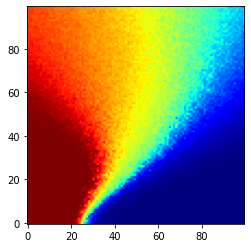

In [39]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors" sector with more rioters heatmap and sector with less rioters heatmap

100.00%


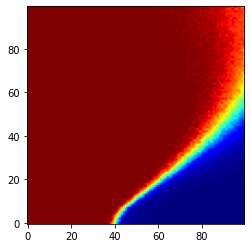

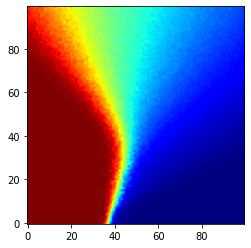

In [6]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

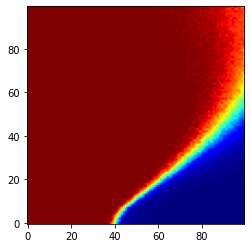

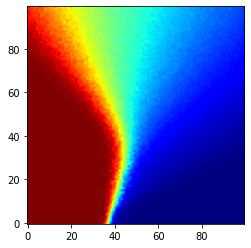

In [8]:
plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_exit" function test

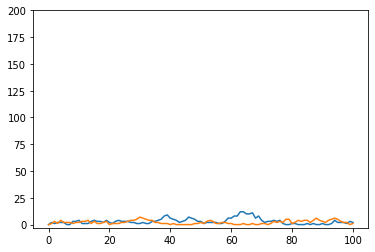

In [15]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_exit(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_exit" sector0 heatmap

100.00%


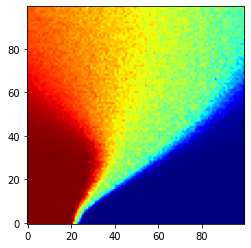

In [12]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_exit(system, steps)[0][-1]
            average_size_0 += final[0][-1]
            average_size_total += final[0][-1] + final[1][-1]
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_0 = average_size_0/simulations
        average_size_total = average_size_total/simulations
        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_0[i][k] = average_size_0
        heat_map_total[i][k] = average_size_total
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor


plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_exit" total rioters heatmap

100.00%


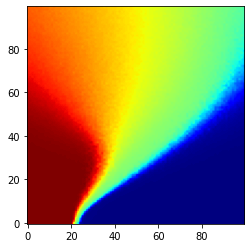

In [13]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_exit(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_exit" sector with more rioters heatmap and sector with less rioters heatmap

100.00%


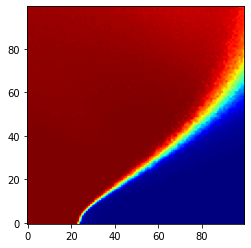

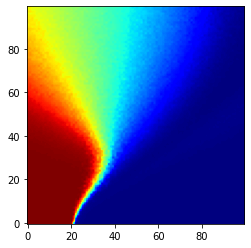

In [14]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_exit(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration" function test

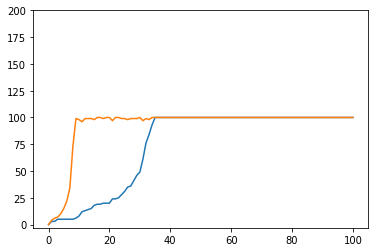

In [15]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration" sector0 heatmap

100.00%


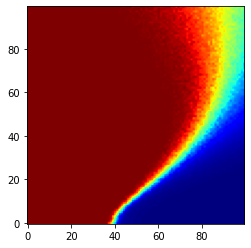

In [16]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration" total rioters heatmap

100.00%


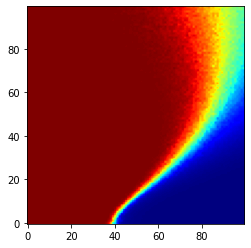

In [17]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration" sector with more rioters heatmap and sector with less rioters heatmap

100.00%


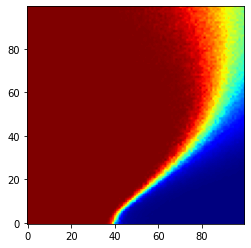

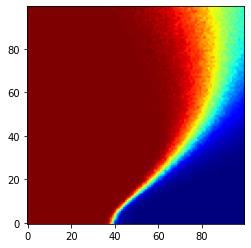

In [18]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration_exit" function test

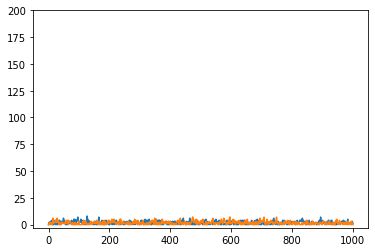

In [19]:
N = 200
average = 45
deviaition = 20

sector0_size = 100
sector1_size = 100
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 1000

migration_probability = 0.01

progression = func.simulate_riot_sectors_migration_exit(system, steps,migration_probability)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N)
plt.show()

"simulate_riot_sectors_migration_exit" sector0 heatmap

100.00%


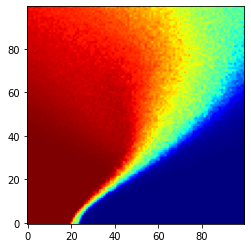

In [20]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_exit(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_exit" total rioters heatmap

100.00%


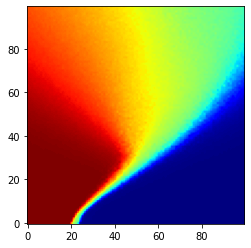

In [21]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_exit(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_exit" sector with more rioters heatmap and sector with less rioters heatmap

100.00%


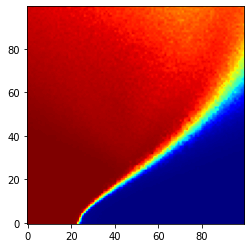

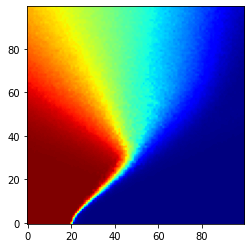

In [22]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_exit(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration_gregarious" function test

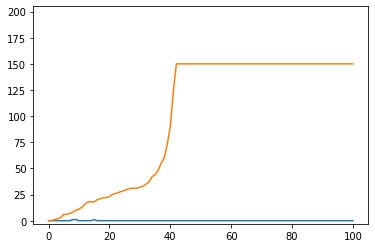

In [2]:
import time
N = 200
average = 55
deviaition = 20

sector0_size = 150
sector1_size = 150

agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration_gregarious(system, steps)


et = time.time()

# get the execution time

plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()

"simulate_riot_sectors_migration_gregarious" sector0 heatmap

100.00%


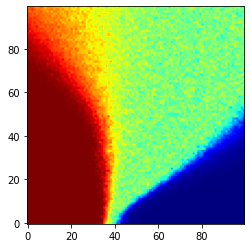

In [3]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_gregarious" total rioters heatmap

100.00%


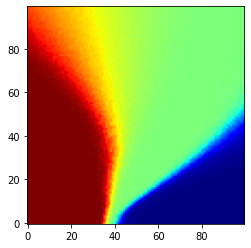

In [70]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_gregarious" sector with more rioters heatmap and sector with less rioters heatmap

100.00%


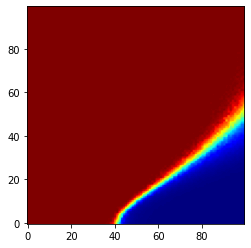

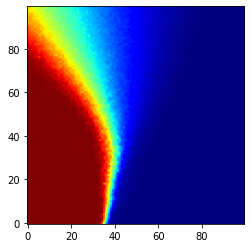

In [71]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" function test

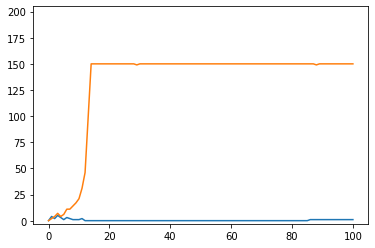

In [72]:
N = 200
average = 35
deviaition = 20

sector0_size = 150
sector1_size = 150
agents0 = func.create_agents(N,average,deviaition)

system = func.System(agents0, sector0_size, sector1_size)

steps = 100

progression = func.simulate_riot_sectors_migration_gregarious_exit(system, steps)


plt.figure()
plt.plot(progression[0])
plt.plot(progression[1])
plt.ylim(-3,N+5)
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" sector0 heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious_exit(system, steps)[0][-1]
            average_size += final

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

62.63%


"simulate_riot_sectors_migration_gregarious_exit" total rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100

steps = 100
simulations = 100

heat_map = np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious_exit(system, steps) 
            average_size += final[0][-1] + final[1][-1]

        average_size = average_size/simulations
        heat_map[i][k] = average_size

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

"simulate_riot_sectors_migration_gregarious_exit" sector with more rioters heatmap and sector with less rioters heatmap

In [ ]:
N = 200
averages_sample = np.arange(0,100)  # average value of the normal distribution
deviations = np.arange(0,100)       # standard deviations of the normal distribution

sector0_size = 100
sector1_size = 100
 
steps = 100
simulations = 100

heat_map_maior = np.zeros((100,100))
heat_map_menor= np.zeros((100,100))

for k in averages_sample:
    clear_output(wait=True)
    print(str("%.2f" % (100*k/99)+"%"), end="\n")

    for i in deviations:         # a set of simulations per standard deviation value
        average_size_maior = 0
        average_size_menor = 0

        for j in range(simulations):   # riot simulation
            agents = func.create_agents(N,k,i)
            system = func.System(agents, sector0_size, sector1_size)
            final = func.simulate_riot_sectors_migration_gregarious_exit(system, steps) 
            average_size_maior += max(final[0][-1],final[1][-1])
            average_size_menor += min(final[0][-1],final[1][-1])

        average_size_maior = average_size_maior/simulations
        average_size_menor = average_size_menor/simulations
        heat_map_maior[i][k] = average_size_maior
        heat_map_menor[i][k] = average_size_menor

plt.figure()
plt.imshow(heat_map_maior, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()

plt.figure()
plt.imshow(heat_map_menor, origin="lower",cmap="jet")
plt.show()

In [9]:
f = open("simulate_riot_sectors.txt", "w")

for i in range(5):
    for j in range(3):
        f.write(str(i) + " " + str(j) + " " + str(heat_map_0[i][j]) + "\n")
f.close()

In [7]:
heat_map_0 = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for i in range(5):
    for j in range(3):
        heat_map_0[i][j] = i*i*i + 2*j
